# Space Titanic dataset analyse

Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load the dataset

In [2]:
filename = "train.csv"
df = pd.read_csv(os.path.join("data", filename))

# Inspect the dataset

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print(f"Shape: {df.shape}")
print()
print(f"Datatypes:\n{df.dtypes}")

print()

Shape: (8693, 14)

Datatypes:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object



train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Source: https://www.kaggle.com/competitions/spaceship-titanic/data

## Inspect missing values

In [5]:
df[df.isna().sum(axis=1) > 0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [6]:
df[df.isna().sum(axis=1) > 0].isna().sum(axis=1).value_counts()

1    1867
2     203
3      17
Name: count, dtype: int64

In [7]:
df[df["HomePlanet"].isna()].isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [8]:
df["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [9]:
df[df["CryoSleep"]==True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0


Conclusions:
 - Dataset contains 8693 rows described by 14 attributes
 - Columns are either floats or strings. Only target column is bool.
 - Almost all columns contain around 200 missing values. The majority of rows have 0 or 1 missing values.
    - 1867 rows have one missing value. Because of large percentage of those rows in dataset, some imputation will be needed.
    - Only 203 rows have 2 missing values. Only 17 rows have 3 missing values. There is no row with more than 3 missing values.
 - Column 'Transported' is target, that we have to predict.
 - 'Passenger_id' column contains two numbers: first indicates a group (number of ticket?) the passenger is travelling with. Second number is their number within the group.
 - 'CryoSleep' columns indicate whether passenger is confied to his room. Those people don't spend any money - this information will be helpful for data imputing.
 - VIP passenger has paid for special services
 - Last name of passenger may indicate, if passengers in group are a family.
 

Things to do during feature engineering and data cleaning phase:
 - impute missing values or remove rows containing them.
 - divide columns PassengerId and Cabin into more atomic attributes
 - bucketize 'Age' and expenses columns
 - Create new features: 'is_travelling_alone', 'is_travelling_with_family'

# Data preparation

Data cleaning and feature engineering that will faciliate analysis and help to get better predictions.

## Create new columns

### Divide id column 

In [10]:
df[["TicketId", "InvidualId"]] = df["PassengerId"].str.split("_", expand=True)
# df = df.drop(columns="PassengerId")
# df = df.set_index(["TicketId", "InvidualId"])

### Divide name column

In [11]:
df[["FirstName", "LastName"]] = df["Name"].str.split(" ", expand=True)

Actually, I don't think that we need FirstName for this analysis. Although LastName column will help us to determine, if travellers sharing the ticket are a family.

In [12]:
df = df.drop(columns=["FirstName", "Name"])

### Divide cabin column

In [13]:
df[["Deck", "Num", "Side"]] = df["Cabin"].str.split("/", expand=True)
df["Num"] = df["Num"].astype('Int16')

Deck  Transported
A     False           129
      True            127
B     True            572
      False           207
C     True            508
      False           239
D     False           271
      True            207
E     False           563
      True            313
F     False          1565
      True           1229
G     True           1321
      False          1238
T     False             4
      True              1
Name: count, dtype: int64


<Axes: xlabel='Deck'>

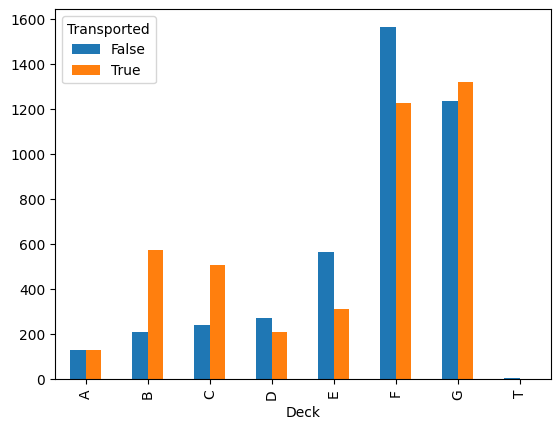

In [14]:
print(df.groupby("Deck")["Transported"].value_counts())
df.groupby("Deck")["Transported"].value_counts().unstack().plot(kind="bar")

Side  Transported
P     False          2308
      True           1898
S     True           2380
      False          1908
Name: count, dtype: int64


<Axes: xlabel='Side'>

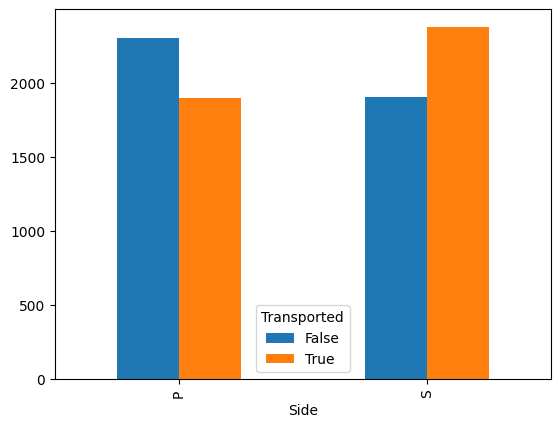

In [15]:
print(df.groupby("Side")["Transported"].value_counts())
df.groupby("Side")["Transported"].value_counts().unstack().plot(kind="bar")

In [16]:
df["Num_bin"] = df["Num"].apply(lambda x: x // 100 * 100) 

<Axes: xlabel='Num_bin'>

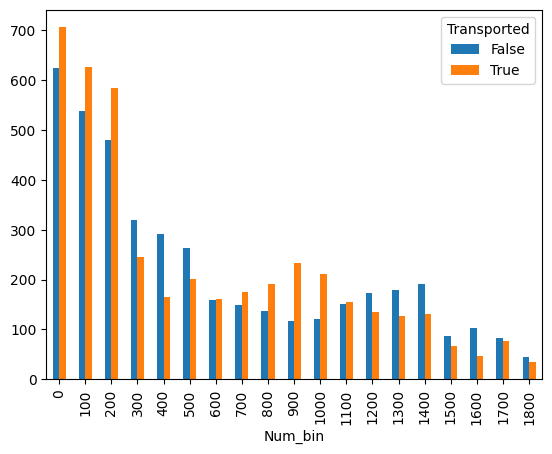

In [17]:
df_g = df.groupby("Num_bin")["Transported"].value_counts().unstack()
df.groupby("Num_bin")["Transported"].value_counts().unstack().plot(kind="bar")

As we can see, survivability differs significantly among different decks and sides of ship. Also room's number seem to suggest us, if particular person could survive. I imagine that rooms are placed in order, and some of them may be easier to evacuate from for example.

### Total spend

In [18]:
expenses_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df["Total spendings"] = df[expenses_columns].sum(axis=1)

In [19]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Transported,TicketId,InvidualId,LastName,Deck,Num,Side,Num_bin,Total spendings
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,False,0001,01,Ofracculy,B,0,P,0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,True,0002,01,Vines,F,0,S,0,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,False,0003,01,Susent,A,0,S,0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,False,0003,02,Susent,A,0,S,0,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,True,0004,01,Santantines,F,1,S,0,1091.0


## Impute values

### Impute cryosleep

As I found out at the beginning of this notebook, people that are in cryosleep don't spend any money. So we can easily fill at least some of the missing values, in columns "CryoSleep" and those containing info about expenses.

In [20]:
df.loc[(df["CryoSleep"].isna()) & (df["Total spendings"] == 0), "CryoSleep"] = False
df.loc[(df["CryoSleep"].isna()) & (df["Total spendings"] > 0), "CryoSleep"] = True

In [21]:
df.loc[(df["CryoSleep"] == True), expenses_columns] = 0

Update Total_spendings column

In [22]:
df["Total spendings"] = df[expenses_columns].sum(axis=1)

In [23]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Transported,TicketId,InvidualId,LastName,Deck,Num,Side,Num_bin,Total spendings
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,False,0001,01,Ofracculy,B,0,P,0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,True,0002,01,Vines,F,0,S,0,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,False,0003,01,Susent,A,0,S,0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,False,0003,02,Susent,A,0,S,0,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,True,0004,01,Santantines,F,1,S,0,1091.0


### Create  column `is_travelling_alone`
This column will let us know, if particular person travells with others on shared ticket.

In [25]:
df["InvidualId"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [47]:
tmp_df = df.iloc[:10, :].copy()
tmp_df.loc[:, "is_travelling_alone"] = False

In [48]:
tmp_df.groupby("TicketId")["InvidualId"].count() > 1

TicketId
0001    False
0002    False
0003     True
0004    False
0005    False
0006     True
0007    False
0008    False
Name: InvidualId, dtype: bool

In [49]:
tmp_df.loc[~(tmp_df.duplicated("TicketId", keep=False)), "is_travelling_alone"] = True

In [51]:
tmp_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,TicketId,InvidualId,LastName,Deck,Num,Side,Num_bin,Total spendings,is_travelling_alone
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,01,Ofracculy,B,0,P,0,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,01,Vines,F,0,S,0,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,01,Susent,A,0,S,0,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,02,Susent,A,0,S,0,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,01,Santantines,F,1,S,0,1091.0,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,True,0005,01,Hinetthews,F,0,P,0,774.0,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,True,0006,01,Jacostaffey,F,2,S,0,1584.0,False
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,True,0006,02,Jacostaffey,G,0,S,0,0.0,False
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,True,0007,01,Beston,F,3,S,0,1018.0,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,True,0008,01,Flatic,B,1,P,0,0.0,True


### Create  column `is_travelling_with_family`
This column will let us know, if particular person travells on shared ticket with people with the same LastName (I assume that they are family members)

In [55]:
tmp_df.loc[:, "is_travelling_with_family"] = False

In [57]:
tmp_df.loc[6, "LastName"] = "Bubbles"

In [59]:
tmp_df.loc[~tmp_df["is_travelling_alone"] & (tmp_df.duplicated("LastName", keep=False)), "is_travelling_with_family"] = True

In [60]:
tmp_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,TicketId,InvidualId,LastName,Deck,Num,Side,Num_bin,Total spendings,is_travelling_alone,is_travelling_with_family
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0001,01,Ofracculy,B,0,P,0,0.0,True,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0002,01,Vines,F,0,S,0,736.0,True,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0003,01,Susent,A,0,S,0,10383.0,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0003,02,Susent,A,0,S,0,5176.0,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0004,01,Santantines,F,1,S,0,1091.0,True,False
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,0005,01,Hinetthews,F,0,P,0,774.0,True,False
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,0006,01,Bubbles,F,2,S,0,1584.0,False,False
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,0006,02,Jacostaffey,G,0,S,0,0.0,False,False
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,0007,01,Beston,F,3,S,0,1018.0,True,False
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,0008,01,Flatic,B,1,P,0,0.0,True,False


In [73]:
df.isna().sum()

HomePlanet         201
CryoSleep            0
Cabin              199
Destination        182
Age                179
VIP                203
RoomService        111
FoodCourt          111
ShoppingMall       107
Spa                115
VRDeck             124
Transported          0
LastName           200
Deck               199
Num                199
Side               199
Num_bin            199
Total spendings      0
dtype: int64

In [74]:
df[df.isna().sum(axis=1) > 0].isna().sum(axis=1).value_counts()

1    1317
5     172
2      91
6      23
7       4
3       1
Name: count, dtype: int64

### Impute names

In [47]:
tickets_id = df.loc[(df["Name"].isna()) & (df["InvidualId"] != "01"), "TicketId"]
tickets_id

KeyError: 'Name'

In [ ]:
tickets_id.values

array(['0082', '0108', '0330', '0337', '0448', '0753', '0770', '0984',
       '1108', '1238', '1287', '1393', '1491', '1865', '1916', '1959',
       '2055', '2092', '2215', '2291', '2589', '2760', '3476', '3496',
       '3680', '3732', '3755', '3862', '3903', '3911', '4005', '4014',
       '4044', '4061', '4182', '4441', '4680', '4726', '4822', '4980',
       '5044', '5052', '5065', '5133', '5527', '5625', '5643', '5698',
       '5756', '5977', '6141', '6433', '6654', '6675', '6708', '6825',
       '7010', '7290', '7596', '7703', '7950', '8366', '9034', '9081',
       '9205'], dtype=object)

In [ ]:
df.loc[df["TicketId"].isin(tickets_id.values)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TicketId,InvidualId
75,0082_01,Mars,False,F/16/P,TRAPPIST-1e,42.0,False,7406.0,0.0,0.0,0.0,0.0,Totse Datte,False,0082,01
76,0082_02,Mars,True,F/16/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Eaturs Datte,True,0082,02
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,0082,03
100,0108_01,Earth,True,G/19/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Natald Handertiz,False,0108,01
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False,0108,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,9081_07,Earth,True,G/1476/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Aliey Clemondsey,True,9081,07
8514,9081_08,Earth,True,G/1476/P,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Virgie Clemondsey,True,9081,08
8628,9205_01,Europa,True,B/300/P,55 Cancri e,37.0,False,0.0,0.0,0.0,0.0,0.0,Thaldah Brakeng,True,9205,01
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9205,02


### Impute Age

CryoSleep
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

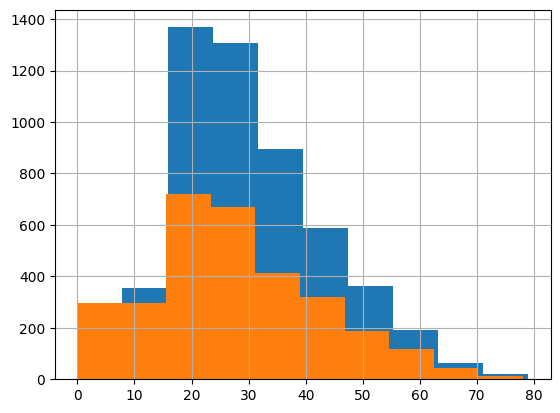

In [ ]:
df.groupby(["CryoSleep"])["Age"].hist()

### Impute Cabin

In [ ]:
df.groupby("Destination")["Deck"].value_counts()

KeyError: 'Column not found: Deck'

In [ ]:
df.groupby("HomePlanet")["Deck"].value_counts()

HomePlanet  Deck
Earth       G       2498
            F       1614
            E        395
Europa      B        766
            C        734
            A        252
            D        186
            E        128
            T          4
Mars        F       1110
            E        330
            D        282
Name: count, dtype: int64

### Impute Destination

In [ ]:
df.groupby("HomePlanet")["Destination"].value_counts()

HomePlanet  Destination  
Earth       TRAPPIST-1e      3101
            PSO J318.5-22     712
            55 Cancri e       690
Europa      TRAPPIST-1e      1189
            55 Cancri e       886
            PSO J318.5-22      19
Mars        TRAPPIST-1e      1475
            55 Cancri e       193
            PSO J318.5-22      49
Name: count, dtype: int64

In [ ]:
df.groupby("Deck")["Destination"].value_counts()

Deck  Destination  
A     TRAPPIST-1e       142
      55 Cancri e       108
      PSO J318.5-22       2
B     TRAPPIST-1e       426
      55 Cancri e       333
      PSO J318.5-22       3
C     TRAPPIST-1e       405
      55 Cancri e       317
      PSO J318.5-22      13
D     TRAPPIST-1e       338
      55 Cancri e       113
      PSO J318.5-22      17
E     TRAPPIST-1e       696
      55 Cancri e       116
      PSO J318.5-22      41
F     TRAPPIST-1e      2088
      55 Cancri e       398
      PSO J318.5-22     241
G     TRAPPIST-1e      1688
      PSO J318.5-22     461
      55 Cancri e       365
T     TRAPPIST-1e         5
Name: count, dtype: int64

### Impute HomePlanet

In [ ]:
df.groupby("Deck")["HomePlanet"].value_counts()

Deck  HomePlanet
A     Europa         252
B     Europa         766
C     Europa         734
D     Mars           282
      Europa         186
E     Earth          395
      Mars           330
      Europa         128
F     Earth         1614
      Mars          1110
G     Earth         2498
T     Europa           4
Name: count, dtype: int64

In [ ]:
df.groupby("Destination")["HomePlanet"].value_counts()

Destination    HomePlanet
55 Cancri e    Europa         886
               Earth          690
               Mars           193
PSO J318.5-22  Earth          712
               Mars            49
               Europa          19
TRAPPIST-1e    Earth         3101
               Mars          1475
               Europa        1189
Name: count, dtype: int64

### Impute Expenses

If person was put in cryosleep, then all of missing values in these columns will be filled with `0`. Otherwise they will be filled with mean value, regarding their Age and Vip status.

In [ ]:
for col in expenses_columns:
    print(f"{col}")
    print(df[df[col].isna()]["CryoSleep"].value_counts())
    print()

RoomService
CryoSleep
False    111
True      70
Name: count, dtype: int64

FoodCourt
CryoSleep
False    111
True      72
Name: count, dtype: int64

ShoppingMall
CryoSleep
False    107
True     101
Name: count, dtype: int64

Spa
CryoSleep
False    115
True      68
Name: count, dtype: int64

VRDeck
CryoSleep
False    124
True      64
Name: count, dtype: int64



## Bin continous values

# Data Analyse

# Predictions - stage 1

# Predictions - stage 2